# Heart disease prediction

## Importing libraries

In [1]:
%config IPCompleter.greedy=True

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


### Loading data into dataframe

In [2]:
dataset = pd.read_csv('cleveland.csv')
dataset.columns = ['age','sex','cp', 'trestbps', 'chol','fbs',
                   'restecg', 'thalach', 'exang', 'oldpeak',
                   'slope', 'ca', 'thal', 'target']

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          299 non-null float64
thal        301 non-null float64
target      303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


### Checking for null  values in all columns of the data

In [4]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

### Replacing null values with mean of respective to the columns data

In [5]:
#Column name
#age----------->numerical
#sex----------->categorial---->0/1
#cp------------>discrete numerical--->1/2/3/4
#trestbps------>numerical
#chol---------->numerical
#fbs----------->categorial---->0/1
#restecg------->categorial---->0/1/2
#thalach------->numerical
#exang--------->categorial---->0/1
#oldpeak------->numerical
#slope--------->categorial---->1/2/3
#ca------------>categorial---->0/1/2/3
#thal---------->categorial---->3/6/7
#target-------->categorial---->0/1

##### Some values in the columns are missing. Missing values may impact the performance of predictor.
##### So to fill the missing values we can replce it with mean of the data of respective columns.
##### If the data in column is discrete replace missing values with the mode.
##### If the data in column is continuous replce missing values with the mean

In [6]:
dataset.ca.fillna(dataset.ca.mean(), inplace=True)
dataset.thal.fillna(dataset.thal.mean(), inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null float64
thal        303 non-null float64
target      303 non-null int64
dtypes: float64(3), int64(11)
memory usage: 33.2 KB


In [8]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [9]:
dataset.ca = dataset.ca.astype(dtype='int64')
dataset.thal = dataset.thal.astype(dtype='int64')

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Statistical summary of the data

In [11]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.663366,4.729373,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.934375,1.934189,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Data visualization to find out outliers and relation between columns 

#### Representation of Correlation between data variables using heatmap 

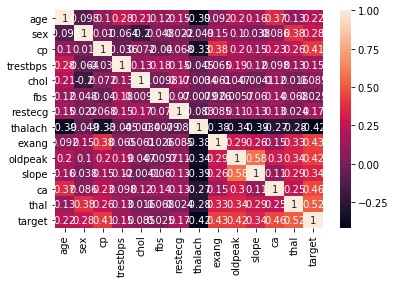

In [12]:
sns.heatmap(dataset.corr(), annot=True)

#### Check for range of values in the columns and detect outliers using boxplot

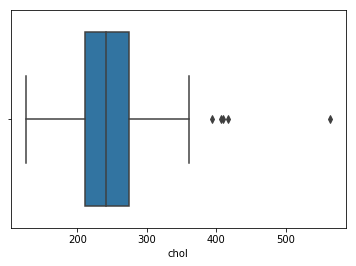

In [13]:
sns.boxplot('chol',data=dataset)

#### Distribution of data of each column using distribution plot

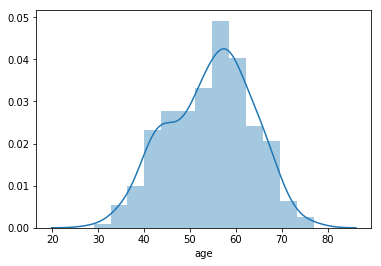

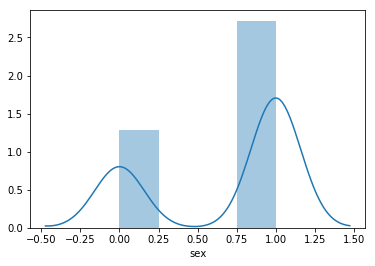

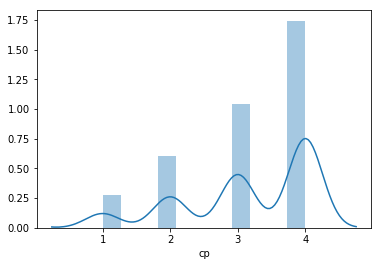

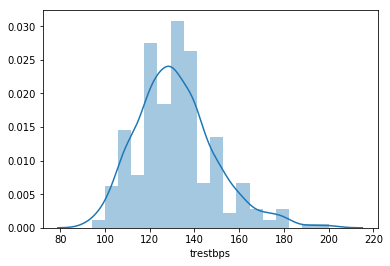

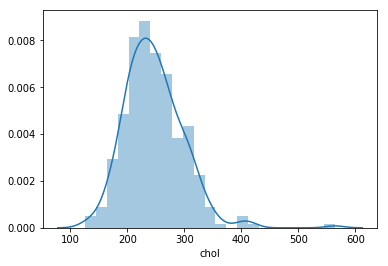

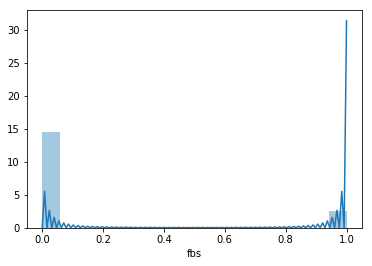

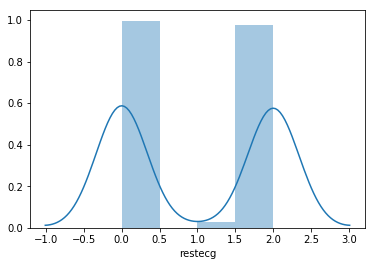

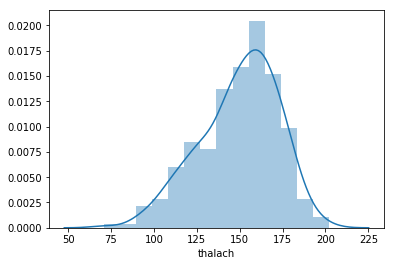

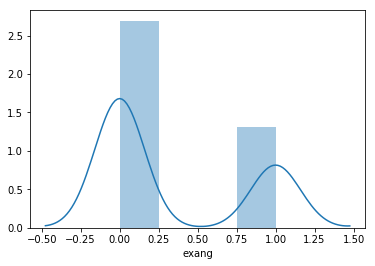

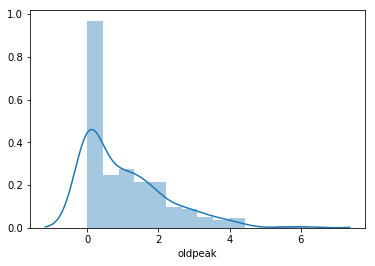

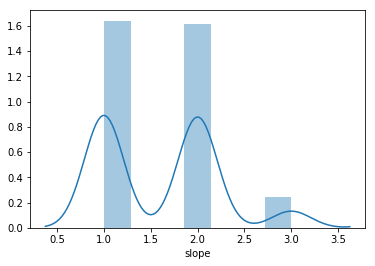

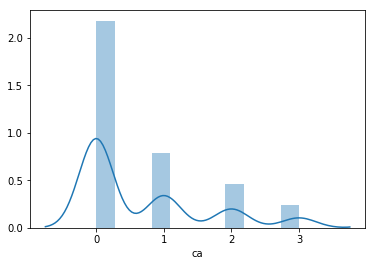

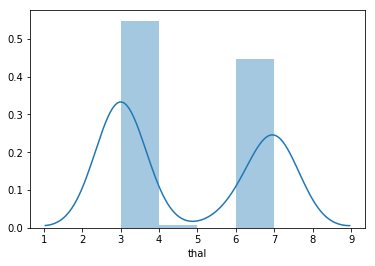

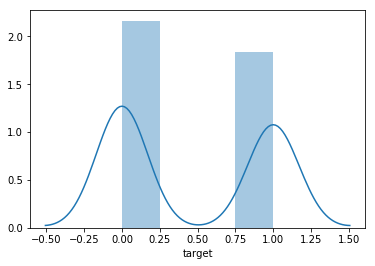

In [14]:
for i,col in enumerate(dataset.columns):
    plt.figure(i)
    sns.distplot(dataset[col])

#### Histogram of the data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001424960B898>,
      dtype=object)

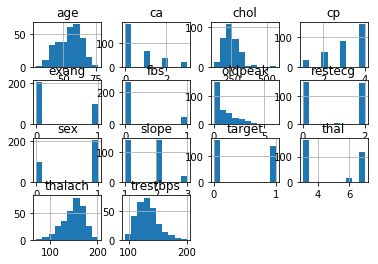

In [15]:
dataset.hist()

## Data Preprocessing and scaling

In [16]:
#import data preprocessing library 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
#for discrete data create dummy variables
#Other method could be applying encoding techniques
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
age          303 non-null int64
trestbps     303 non-null int64
chol         303 non-null int64
thalach      303 non-null int64
oldpeak      303 non-null float64
target       303 non-null int64
sex_0        303 non-null uint8
sex_1        303 non-null uint8
cp_1         303 non-null uint8
cp_2         303 non-null uint8
cp_3         303 non-null uint8
cp_4         303 non-null uint8
fbs_0        303 non-null uint8
fbs_1        303 non-null uint8
restecg_0    303 non-null uint8
restecg_1    303 non-null uint8
restecg_2    303 non-null uint8
exang_0      303 non-null uint8
exang_1      303 non-null uint8
slope_1      303 non-null uint8
slope_2      303 non-null uint8
slope_3      303 non-null uint8
ca_0         303 non-null uint8
ca_1         303 non-null uint8
ca_2         303 non-null uint8
ca_3         303 non-null uint8
thal_3       303 non-null uint8
thal_4       303 non-null uin

#### Scaling data into one scale to get better results \n
#### Selecting columns to scale 
#### Columns with the wide range of data variation are scaled

In [19]:
#Scaling data into one standard scale
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

### Selecting features and label data to train model and predict

Target variable has values 0/1 that is yes/no to predict presence of heart disease. Hence data of 'target' variable is the Label for classification.
Label----> y----> yes/no---->0/1

All other features age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' are used to contribute in the result of analysis and prediction the result.

#### Spliting data into 8:2 proportion to train and test 

In [20]:
#Feature selection
y = dataset['target'].values
X = dataset.drop(['target'], axis = 1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

## Machine Learning models
### Importing libraries

In [21]:
#import libraries to implement models on the data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Model1:  Logistic Regression

In [22]:
model1 = LogisticRegression()
model1.fit(X_train,y_train)

print("Train score of Logistic Regression: {}".format(model1.score(X_train,y_train)*100))
print("Test score of Logistic Regression: {}".format(model1.score(X_test,y_test)*100))

Train score of Logistic Regression: 87.60330578512396
Test score of Logistic Regression: 90.1639344262295


## Model2:  K Nearest Neighbors Classification

In [23]:
model2 = KNeighborsClassifier(n_neighbors=7)
model2.fit(X_train,y_train)

print("Train score of K-Neighbors Classification: {}".format(model2.score(X_train,y_train)*100))
print("Test score of K-Neighbors Classification: {}".format(model2.score(X_test,y_test)*100))

Train score of K-Neighbors Classification: 87.60330578512396
Test score of K-Neighbors Classification: 88.52459016393442


## Model3: Support Vector Classification

In [24]:
model3 = SVC(kernel='rbf')
model3.fit(X_train,y_train)

print("Train score of SVC: {}".format(model3.score(X_train,y_train)*100))
print("Test score of SVC: {}".format(model3.score(X_test,y_test)*100))

Train score of SVC: 87.19008264462809
Test score of SVC: 86.88524590163934


## Model4:  Decision Tree Classification

In [25]:
model4 = DecisionTreeClassifier()
model4.fit(X_train,y_train)

print("Train score of Decision Tree Classification: {}".format(model4.score(X_train,y_train)*100))
print("Test score of Decision Tree Classification: {}".format(model4.score(X_test,y_test)*100))

Train score of Decision Tree Classification: 100.0
Test score of Decision Tree Classification: 80.32786885245902


## Model5:  Random Forest Classification

In [26]:
model5 = RandomForestClassifier()
model5.fit(X_train,y_train)

print("Train score of Random Forest Classification: {}".format(model5.score(X_train,y_train)*100))
print("Test score of Random Forest Classification: {}".format(model5.score(X_test,y_test)*100))

Train score of Random Forest Classification: 100.0
Test score of Random Forest Classification: 80.32786885245902


## From the above algorithms we got good accuracy for our dataset

### Evaluation of the Models using Confusion matrix

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## Logistic Regression

In [28]:
print(confusion_matrix(y, model1.predict(X)))

[[150  14]
 [ 22 117]]


In [29]:
print(classification_report(y, model1.predict(X)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       164
           1       0.89      0.84      0.87       139

   micro avg       0.88      0.88      0.88       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303



## KNN

In [30]:
print(confusion_matrix(y, model2.predict(X)))

[[149  15]
 [ 22 117]]


In [31]:
print(classification_report(y, model2.predict(X)))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       164
           1       0.89      0.84      0.86       139

   micro avg       0.88      0.88      0.88       303
   macro avg       0.88      0.88      0.88       303
weighted avg       0.88      0.88      0.88       303



## SVC

In [32]:
print(confusion_matrix(y, model3.predict(X)))

[[149  15]
 [ 24 115]]


In [33]:
print(classification_report(y, model3.predict(X)))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       164
           1       0.88      0.83      0.86       139

   micro avg       0.87      0.87      0.87       303
   macro avg       0.87      0.87      0.87       303
weighted avg       0.87      0.87      0.87       303



## Decision Tree Classification

In [34]:
print(confusion_matrix(y, model4.predict(X)))

[[159   5]
 [  7 132]]


In [35]:
print(classification_report(y, model4.predict(X)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       164
           1       0.96      0.95      0.96       139

   micro avg       0.96      0.96      0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



## Random Forest Classification

In [36]:
print(confusion_matrix(y, model5.predict(X)))

[[160   4]
 [  8 131]]


In [37]:
print(classification_report(y, model5.predict(X)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       164
           1       0.97      0.94      0.96       139

   micro avg       0.96      0.96      0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303



## Conclusion

#### The project involved analysis of the heart disease patient dataset with proper data processing. Then, 5 models were trained and tested with maximum scores as follows:

1. Logistic Regression: 90.16%
2. K Neighbors Classifier: 88.52%
3. Support Vector Classifier: 86.88%
4. Decision Tree Classifier: 81.96%
5. Random Forest Classifier: 78.68%